<a href="https://colab.research.google.com/github/2002sairuthvik/PortfolioProjects/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4de079df-ca51-46bd-a27a-5537e2e95139',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-08-27T19:36:19.837Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9996}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11651, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [ ]:
type(data)

dict

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974587e+07,1.974587e+07,False,NaN,1,NaN,NaN,None,2024-08-27T19:34:00.000Z,62085.970578,3.090284e+10,10.8891,0.259046,-2.309834,4.504391,-8.944075,3.216984,-8.106339,1.225941e+12,56.3566,1.303805e+12,None,2024-08-27T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
1,1027,Ethereum,ETH,ethereum,9248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202989e+08,1.202989e+08,True,NaN,2,NaN,NaN,None,2024-08-27T19:33:00.000Z,2586.029786,1.398568e+10,12.3849,0.299059,-3.956654,-0.452777,-21.011493,-23.393019,-31.282379,3.110966e+11,14.3073,3.110966e+11,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
2,825,Tether USDt,USDT,tether,95660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.999998,5.334363e+10,4.4914,0.007590,-0.040013,-0.021436,0.003322,0.203304,0.086963,1.180391e+11,5.4283,1.202561e+11,None,2024-08-27T19:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 19:36:21.134152
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-27T19:33:00.000Z,549.135948,1.783707e+09,0.7230,-0.054063,-0.927528,-3.957843,-5.991543,-3.834669,-7.762162,8.013828e+10,3.6843,8.013828e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661583e+08,5.831989e+08,True,NaN,5,NaN,NaN,None,2024-08-27T19:33:00.000Z,154.967595,2.207532e+09,-16.6065,0.023164,-2.079632,7.882544,-16.289849,9.407004,-9.376561,7.223944e+10,3.3223,9.037693e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
5,3408,USDC,USDC,usd-coin,21695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.430248e+10,3.430248e+10,False,NaN,6,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.999997,5.536056e+09,0.6110,0.009593,0.007288,0.000268,-0.004762,0.023798,-0.007215,3.430237e+10,1.5769,3.430237e+10,None,2024-08-27T19:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 19:36:21.134152
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.594403,1.086688e+09,-0.6671,-0.427109,2.076236,-1.178476,-1.433566,25.261005,13.078434,3.339362e+10,1.5361,5.944031e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457108e+11,1.457108e+11,True,NaN,8,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.104588,4.854892e+08,-13.8879,0.450389,-0.700234,0.648716,-19.794905,-15.477965,-37.081416,1.523963e+10,0.7008,1.523963e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
8,11419,Toncoin,TON,toncoin,535,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.534759e+

In [ ]:
def api_runner():
  global df
  url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
  parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
  }
  headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '4de079df-ca51-46bd-a27a-5537e2e95139',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df  = pd.concat([df, df2])

  # if not os.path.isfile(r'C:\Users\Dowloam\Documents\Python Scripts\API.csv'):
  #   df.to_csv(r'C:\Users\Dowlom\Documents\Python Scripts\API.csv', header='column_names')
  # else:
  #   df.to_csv(r'C:\Users\Dowlom\Documents\Python Scripts\API.csv', mode='a', header=False)

In [ ]:
import os
from time import time
from time import sleep
# if __name__ == '__main__':
#   while True:
#     api_runner()
#     sleep(60) #sleep for 1 minute
for i in range(333):
  api_runner()
  print('API Runner completed')
  sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.974587e+07,1.974587e+07,False,NaN,1,NaN,NaN,None,2024-08-27T19:34:00.000Z,62085.970578,3.090284e+10,10.8891,0.259046,-2.309834,4.504391,-8.944075,3.216984,-8.106339,1.225941e+12,56.3566,1.303805e+12,None,2024-08-27T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
1,1027,Ethereum,ETH,ethereum,9248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202989e+08,1.202989e+08,True,NaN,2,NaN,NaN,None,2024-08-27T19:33:00.000Z,2586.029786,1.398568e+10,12.3849,0.299059,-3.956654,-0.452777,-21.011493,-23.393019,-31.282379,3.110966e+11,14.3073,3.110966e+11,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
2,825,Tether USDt,USDT,tether,95660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.180393e+11,1.202563e+11,True,NaN,3,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.999998,5.334363e+10,4.4914,0.007590,-0.040013,-0.021436,0.003322,0.203304,0.086963,1.180391e+11,5.4283,1.202561e+11,None,2024-08-27T19:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 19:36:21.134152
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459352e+08,1.459352e+08,False,NaN,4,NaN,NaN,None,2024-08-27T19:33:00.000Z,549.135948,1.783707e+09,0.7230,-0.054063,-0.927528,-3.957843,-5.991543,-3.834669,-7.762162,8.013828e+10,3.6843,8.013828e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.661583e+08,5.831989e+08,True,NaN,5,NaN,NaN,None,2024-08-27T19:33:00.000Z,154.967595,2.207532e+09,-16.6065,0.023164,-2.079632,7.882544,-16.289849,9.407004,-9.376561,7.223944e+10,3.3223,9.037693e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
5,3408,USDC,USDC,usd-coin,21695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.430248e+10,3.430248e+10,False,NaN,6,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.999997,5.536056e+09,0.6110,0.009593,0.007288,0.000268,-0.004762,0.023798,-0.007215,3.430237e+10,1.5769,3.430237e+10,None,2024-08-27T19:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 19:36:21.134152
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.618009e+10,9.998732e+10,False,NaN,7,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.594403,1.086688e+09,-0.6671,-0.427109,2.076236,-1.178476,-1.433566,25.261005,13.078434,3.339362e+10,1.5361,5.944031e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.457108e+11,1.457108e+11,True,NaN,8,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.104588,4.854892e+08,-13.8879,0.450389,-0.700234,0.648716,-19.794905,-15.477965,-37.081416,1.523963e+10,0.7008,1.523963e+10,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
8,11419,Toncoin,TON,toncoin,535,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.534759e+

In [ ]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11651,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19745868.00000,19745868.00000,False,NaN,1,NaN,NaN,None,2024-08-27T19:34:00.000Z,62085.97058,30902838230.58335,10.88910,0.25905,-2.30983,4.50439,-8.94408,3.21698,-8.10634,1225941379690.16406,56.35660,1303805382143.41992,None,2024-08-27T19:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
1,1027,Ethereum,ETH,ethereum,9248,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120298912.44583,120298912.44583,True,NaN,2,NaN,NaN,None,2024-08-27T19:33:00.000Z,2586.02979,13985683136.32076,12.38490,0.29906,-3.95665,-0.45278,-21.01149,-23.39302,-31.28238,311096570782.36359,14.30730,311096570782.35999,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
2,825,Tether USDt,USDT,tether,95660,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118039332678.20683,120256329980.56221,True,NaN,3,NaN,NaN,None,2024-08-27T19:33:00.000Z,1.00000,53343629770.12517,4.49140,0.00759,-0.04001,-0.02144,0.00332,0.20330,0.08696,118039132765.79234,5.42830,120256126313.42000,None,2024-08-27T19:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-27 19:36:21.134152
3,1839,BNB,BNB,bnb,2220,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145935232.79699,145935232.79699,False,NaN,4,NaN,NaN,None,2024-08-27T19:33:00.000Z,549.13595,1783707398.15267,0.72300,-0.05406,-0.92753,-3.95784,-5.99154,-3.83467,-7.76216,80138282336.78391,3.68430,80138282336.78000,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466158338.33572,583198867.51458,True,NaN,5,NaN,NaN,None,2024-08-27T19:33:00.000Z,154.96760,2207531838.23761,-16.60650,0.02316,-2.07963,7.88254,-16.28985,9.40700,-9.37656,72239436749.57066,3.32230,90376926116.25000,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
5,3408,USDC,USDC,usd-coin,21695,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34302477144.64983,34302477144.64983,False,NaN,6,NaN,NaN,None,2024-08-27T19:33:00.000Z,1.00000,5536055629.48068,0.61100,0.00959,0.00729,0.00027,-0.00476,0.02380,-0.00722,34302365148.91209,1.57690,34302365148.91000,None,2024-08-27T19:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-27 19:36:21.134152
6,52,XRP,XRP,xrp,1372,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56180094752.00000,99987315360.00000,False,NaN,7,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.59440,1086687710.96288,-0.66710,-0.42711,2.07624,-1.17848,-1.43357,25.26101,13.07843,33393624657.42173,1.53610,59440313877.78000,None,2024-08-27T19:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-27 19:36:21.134152
7,74,Dogecoin,DOGE,dogecoin,1047,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145710846383.70520,145710846383.70520,True,NaN,8,NaN,NaN,None,2024-08-27T19:33:00.000Z,0.10459,485489185.64431,-13.88790,0.45039,-0.70023,0.64872,-19.79490,-15.47797,-37.08142,15239628412.21357,0.70080,15239628412.21000,None,2024-08-27T19:33:00.000Z,NaN,Na

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.19415,-2.24810,4.10275,-9.09639,3.00554,-7.98655
Ethereum,0.05980,-3.77607,-0.77360,-21.09287,-23.40787,-31.15762
Tether USDt,0.00551,-0.03379,-0.01131,0.01360,0.20590,0.09686
BNB,-0.13349,-0.66555,-4.11179,-5.89563,-3.64774,-7.46517
Solana,-0.37037,-2.18116,7.34048,-16.37957,10.00097,-8.83802
USDC,0.00195,0.00226,-0.00231,0.00205,0.01101,-0.00673
XRP,-0.49405,1.86197,-1.42592,-1.61574,25.26013,13.21594
Dogecoin,-0.13982,-1.23697,-0.01162,-19.85657,-15.44076,-36.97970
Toncoin,0.79754,3.86349,-16.66023,-15.77993,-25.49279,-14.15471


In [ ]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.19415
             quote.USD.percent_change_24h    -2.24810
             quote.USD.percent_change_7d      4.10275
             quote.USD.percent_change_30d    -9.09639
             quote.USD.percent_change_60d     3.00554
             quote.USD.percent_change_90d    -7.98655
Ethereum     quote.USD.percent_change_1h      0.05980
             quote.USD.percent_change_24h    -3.77607
             quote.USD.percent_change_7d     -0.77360
             quote.USD.percent_change_30d   -21.09287
             quote.USD.percent_change_60d   -23.40787
             quote.USD.percent_change_90d   -31.15762
Tether USDt  quote.USD.percent_change_1h      0.00551
             quote.USD.percent_change_24h    -0.03379
             quote.USD.percent_change_7d     -0.01131
             quote.USD.percent_change_30d     0.01360
             quote.USD.percent_change_60d     0.20590
             quote.USD.percent_change_90d     0.09686
BNB          quote.USD.percent_change_1h     -0.13349
             quote.USD.percent_change_24h    -0.66555
             quote.USD.percent_change_7d     -4.11179
             quote.USD.percent_change_30d    -5.89563
             quote.USD.percent_change_60d    -3.64774
             quote.USD.percent_change_90d    -7.46517
Solana       quote.USD.percent_change_1h     -0.37037
             quote.USD.percent_change_24h    -2.18116
             quote.USD.percent_change_7d      7.34048
             quote.USD.percent_change_30d   -16.37957
             quote.USD.percent_change_60d    10.00097
             quote.USD.percent_change_90d    -8.83802
USDC         quote.USD.percent_change_1h      0.00195
             quote.USD.percent_change_24h     0.00226
             quote.USD.percent_change_7d     -0.00231
             quote.USD.percent_change_30d     0.00205
             quote.USD.percent_change_60d     0.01101
             quote.USD.percent_change_90d    -0.00673
XRP          quote.USD.percent_change_1h     -0.49405
             quote.USD.percent_change_24h     1.86197
             quote.USD.percent_change_7d     -1.42592
             quote.USD.percent_change_30d    -1.61574
             quote.USD.percent_change_60d    25.26013
             quote.USD.percent_change_90d    13.21594
Dogecoin     quote.USD.percent_change_1h     -0.13982
             quote.USD.percent_change_24h    -1.23697
             quote.USD.percent_change_7d     -0.01162
             quote.USD.percent_change_30d   -19.85657
             quote.USD.percent_change_60d   -15.44076
             quote.USD.percent_change_90d   -36.97970
Toncoin      quote.USD.percent_change_1h      0.79754
             quote.USD.percent_change_24h     3.86349
             quote.USD.percent_change_7d    -16.66023
             quote.USD.percent_change_30d   -15.77993
             quote.USD.percent_change_60d   -25.49279
             quote.USD.percent_change_90d   -14.15471
TRON         quote.USD.percent_change_1h     -0.11700
             quote.USD.percent_change_24h    -1.48512
             quote.USD.percent_change_7d      2.85626
             quote.USD.percent_change_30d    16.72279
             quote.USD.percent_change_60d    31.52026
             quote.USD.percent_change_90d    44.38193
Cardano      quote.USD.percent_change_1h     -0.56781
             quote.USD.percent_change_24h    -0.88652
             quote.USD.percent_change_7d      5.10110
             quote.USD.percent_change_30d   -11.11242
             quote.USD.percent_change_60d    -7.11616
             quote.USD.percent_change_90d   -19.46755
Avalanche    quote.USD.percent_change_1h     -0.63792
             quote.USD.percent_change_24h    -2.79458
             quote.USD.percent_change_7d     13.04356
             quote.USD.percent_change_30d    -7.18883
             quote.USD.percent_change_60d    -9.02592
             quote.USD.percent_change_90d   -29.84967
Shiba Inu    quote.USD.percent_change_1h     -0.52055
             quo

In [ ]:
type(df4)

pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.19415
            quote.USD.percent_change_24h  -2.24810
            quote.USD.percent_change_7d    4.10275
            quote.USD.percent_change_30d  -9.09639
            quote.USD.percent_change_60d   3.00554
            quote.USD.percent_change_90d  -7.98655
Ethereum    quote.USD.percent_change_1h    0.05980
            quote.USD.percent_change_24h  -3.77607
            quote.USD.percent_change_7d   -0.77360
            quote.USD.percent_change_30d -21.09287
            quote.USD.percent_change_60d -23.40787
            quote.USD.percent_change_90d -31.15762
Tether USDt quote.USD.percent_change_1h    0.00551
            quote.USD.percent_change_24h  -0.03379
            quote.USD.percent_change_7d   -0.01131
            quote.USD.percent_change_30d   0.01360
            quote.USD.percent_change_60d   0.20590
            quote.USD.percent_change_90d   0.09686
BNB         quote.USD.percent_change_1h   -0.13349
            quote.USD.percent_change_24h  -0.66555
            quote.USD.percent_change_7d   -4.11179
            quote.USD.percent_change_30d  -5.89563
            quote.USD.percent_change_60d  -3.64774
            quote.USD.percent_change_90d  -7.46517
Solana      quote.USD.percent_change_1h   -0.37037
            quote.USD.percent_change_24h  -2.18116
            quote.USD.percent_change_7d    7.34048
            quote.USD.percent_change_30d -16.37957
            quote.USD.percent_change_60d  10.00097
            quote.USD.percent_change_90d  -8.83802
USDC        quote.USD.percent_change_1h    0.00195
            quote.USD.percent_change_24h   0.00226
            quote.USD.percent_change_7d   -0.00231
            quote.USD.percent_change_30d   0.00205
            quote.USD.percent_change_60d   0.01101
            quote.USD.percent_change_90d  -0.00673
XRP         quote.USD.percent_change_1h   -0.49405
            quote.USD.percent_change_24h   1.86197
            quote.USD.percent_change_7d   -1.42592
            quote.USD.percent_change_30d  -1.61574
            quote.USD.percent_change_60d  25.26013
            quote.USD.percent_change_90d  13.21594
Dogecoin    quote.USD.percent_change_1h   -0.13982
            quote.USD.percent_change_24h  -1.23697
            quote.USD.percent_change_7d   -0.01162
            quote.USD.percent_change_30d -19.85657
            quote.USD.percent_change_60d -15.44076
            quote.USD.percent_change_90d -36.97970
Toncoin     quote.USD.percent_change_1h    0.79754
            quote.USD.percent_change_24h   3.86349
            quote.USD.percent_change_7d  -16.66023
            quote.USD.percent_change_30d -15.77993
            quote.USD.percent_change_60d -25.49279
            quote.USD.percent_change_90d -14.15471
TRON        quote.USD.percent_change_1h   -0.11700
            quote.USD.percent_change_24h  -1.48512
            quote.USD.percent_change_7d    2.85626
            quote.USD.percent_change_30d  16.72279
            quote.USD.percent_change_60d  31.52026
            quote.USD.percent_change_90d  44.38193
Cardano     quote.USD.percent_change_1h   -0.56781
            quote.USD.percent_change_24h  -0.88652
            quote.USD.percent_change_7d    5.10110
            quote.USD.percent_change_30d -11.11242
            quote.USD.percent_change_60d  -7.11616
            quote.USD.percent_change_90d -19.46755
Avalanche   quote.USD.percent_change_1h   -0.63792
            quote.USD.percent_change_24h  -2.79458
            quote.USD.percent_change_7d   13.04356
            quote.USD.percent_change_30d  -7.18883
            quote.USD.percent_change_60d  -9.02592
            quote.USD.percent_change_90d -29.84967
Shiba Inu   quote.USD.percent_change_1h   -0.52055
            quote.USD.percent_change_24h  -0.17140
            quote.USD.percent_change_7d    5.06494
            quote.USD.percent_change_30d -14.10769
            quote.USD.percent_change_60d -14.99930
            quo

In [ ]:
type(df5)
df5.count()

,0
values,90


In [ ]:
index = pd.Index(range(90))


df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19415
1,Bitcoin,quote.USD.percent_change_24h,-2.24810
2,Bitcoin,quote.USD.percent_change_7d,4.10275
3,Bitcoin,quote.USD.percent_change_30d,-9.09639
4,Bitcoin,quote.USD.percent_change_60d,3.00554
5,Bitcoin,quote.USD.percent_change_90d,-7.98655
6,Ethereum,quote.USD.percent_change_1h,0.05980
7,Ethereum,quote.USD.percent_change_24h,-3.77607
8,Ethereum,quote.USD.percent_change_7d,-0.77360
9,Ethereum,quote.USD.percent_change_30d,-21.09287


In [ ]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19415
1,Bitcoin,quote.USD.percent_change_24h,-2.24810
2,Bitcoin,quote.USD.percent_change_7d,4.10275
3,Bitcoin,quote.USD.percent_change_30d,-9.09639
4,Bitcoin,quote.USD.percent_change_60d,3.00554
5,Bitcoin,quote.USD.percent_change_90d,-7.98655
6,Ethereum,quote.USD.percent_change_1h,0.05980
7,Ethereum,quote.USD.percent_change_24h,-3.77607
8,Ethereum,quote.USD.percent_change_7d,-0.77360
9,Ethereum,quote.USD.percent_change_30d,-21.09287


In [ ]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.19415
1,Bitcoin,24h,-2.24810
2,Bitcoin,7d,4.10275
3,Bitcoin,30d,-9.09639
4,Bitcoin,60d,3.00554
5,Bitcoin,90d,-7.98655
6,Ethereum,1h,0.05980
7,Ethereum,24h,-3.77607
8,Ethereum,7d,-0.77360
9,Ethereum,30d,-21.09287


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

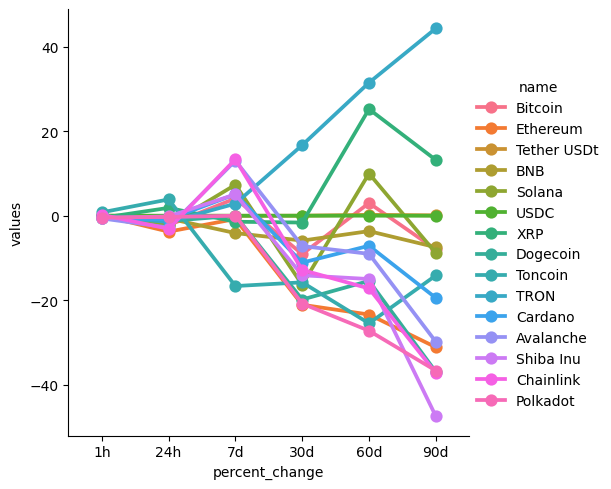

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point' )

In [ ]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,62085.97058,2024-08-27 19:36:21.134152
0,Bitcoin,61991.19895,2024-08-27 19:56:15.829828
0,Bitcoin,61942.37514,2024-08-27 19:57:16.118699
0,Bitcoin,61942.37514,2024-08-27 19:58:16.348376
0,Bitcoin,61882.62745,2024-08-27 19:59:16.590700
0,Bitcoin,61882.62745,2024-08-27 20:00:21.827504


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

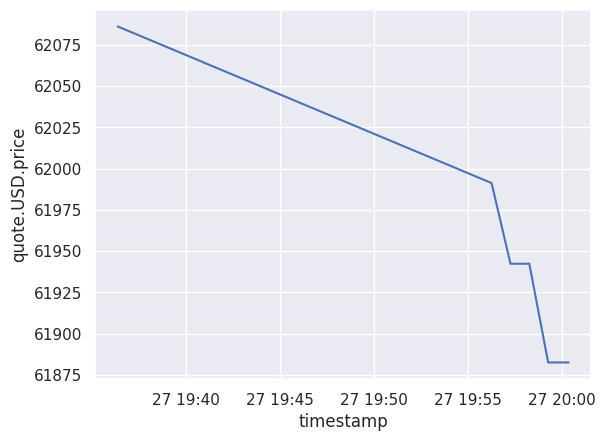

In [ ]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)
